In [67]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
%matplotlib inline

In [122]:
img = plt.imread("bird.png")

In [153]:
img1 = np.array(img)[:500, :500, :3]

In [158]:
img1.shape

(500, 500, 3)

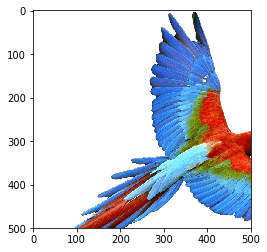

In [159]:
plt.imshow(img1)

In [160]:
img2d = img1[:, :, :]

In [161]:
img2d.shape

(500, 500, 3)

In [162]:
plt.imshow(zca_whiten(img2d))

ValueError: shapes (500,500,3) and (500,500) not aligned: 3 (dim 2) != 500 (dim 0)

In [33]:
np.diag(a)

array([ 0, 21, 42, 63, 84])

In [39]:
b = np.identity(200)

In [41]:
np.set_printoptions(threshold=np.nan)

In [44]:
eps = 0.1

In [47]:
diagS = np.multiply(img1, b) + eps

In [49]:
temp1= 1/ np.sqrt(diagS)

In [50]:
temp2 = np.multiply(temp1, b)

In [56]:
e_value, U = np.linalg.eig(temp2)

In [62]:
U

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

In [58]:
e_value

array([ 1.82574185,  1.82574185,  1.82574185,  1.82574185,  1.82574185,
        1.82574185,  1.82574185,  1.82574185,  1.82574185,  1.82574185,
        1.82574185,  1.82574185,  1.82574185,  1.82574185,  1.82574185,
        1.82574185,  1.83779308,  1.83779308,  1.83779308,  1.85008615,
        1.85008615,  1.86262925,  1.86262925,  1.86262925,  1.86262925,
        1.86262925,  1.86262925,  1.87543097,  1.87543097,  1.88850033,
        1.88850033,  1.88850033,  1.90184679,  1.90184679,  1.90184679,
        1.90184679,  1.90184679,  1.90184679,  1.90184679,  1.90184679,
        1.92941122,  1.92941122,  1.92941122,  1.91548028,  1.91548028,
        1.90184679,  1.90184679,  1.90184679,  1.90184679,  1.90184679,
        1.90184679,  1.88850033,  1.88850033,  1.87543097,  1.87543097,
        1.87543097,  1.86262925,  1.86262925,  1.86262925,  1.86262925,
        1.86262925,  1.86262925,  1.86262925,  1.86262925,  1.86262925,
        1.86262925,  1.86262925,  1.86262925,  1.86262925,  1.86

In [151]:
def zca_whiten(X):
    """
    Applies ZCA whitening to the data (X)
    http://xcorr.net/2011/05/27/whiten-a-matrix-matlab-code/

    X: numpy 2d array
        input data, rows are data points, columns are features

    Returns: ZCA whitened 2d array
    """
#     assert(X.ndim == 2)
    EPS = 10e-5
    X_white = np.array(X.shape)
    for i in range(3):
        #   covariance matrix
        cov = np.dot(X[:, :, i].T, X[:, :, i])
        #   d = (lambda1, lambda2, ..., lambdaN)
        d, E = np.linalg.eigh(cov)
        #   D = diag(d) ^ (-1/2)
        D = np.diag(1. / np.sqrt(np.abs(d) + EPS))
        #   W_zca = E * D * E.T
        W = np.dot(np.dot(E, D), E.T)

        X_white[:, :, i] = np.dot(X, W).reshape(X.shape[0])

    return X_white